# Diamond Price Prediction In R 

In [92]:
# Project Description:

# Problems:

# A jewelry company wants to put in a bid to purchase a large set of diamonds but the 
# problem is that the company does not know how much it should bid. The opportunity for
# the company is to use the edge-cutting data science to predict the price for 3,000 
# diamonds with a high confident level.

# Goals:

# The goal for data science team to use machine learning techniques to obtain the predicted 
# diamond price with the minimum errors from the actual price, which will involve the 
# thorough exploratory data analysis, data mining and predictive modeling analysis.

# Criteria:

# The criteria for the success are the benchmark that the total predicted dollars at $12.7 
# million. 

# Assumptions:

# Assumptions are the actual price of diamonds provided in the historical dataset 
# kept as currently value without inflation.  The suggested bid price 0.7 to multiply the 
# predicted price.

# Tools: 

# The entire data science process of diamond price prediction is implemented in R through
# Jupyter Notebook. 


# Import and Clean Data

In [2]:
# Import packages
library(magrittr) 
library(tidyverse)
library(ggplot2)
library(GGally) 
library(MASS)
library(gridExtra)
library(caret) 
library(vcd) 

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::extract()   masks magrittr::extract()
x dplyr::filter()    masks stats::filter()
x dplyr::lag()       masks stats::lag()
x purrr::set_names() masks magrittr::set_names()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Loading required pac

In [3]:
# Import the data historical diamond dataset and new diamond dataset
raw<-read.csv("D:/DSPS/DIAMONDS/DATA/TRAINING/diamonds.csv")
new <- read.csv("D:/DSPS/DIAMONDS/DATA/TEST/new_diamonds.csv")

# Check the size
dim(raw)
dim(new)

[1] 53940    11

[1] 3000    7

In [4]:
# Check the structure
str(raw)

'data.frame':	53940 obs. of  11 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Factor w/ 5 levels "Fair","Good",..: 3 4 2 4 2 5 5 5 1 5 ...
 $ color  : Factor w/ 7 levels "D","E","F","G",..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Factor w/ 8 levels "I1","IF","SI1",..: 4 3 5 6 4 8 7 3 6 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [5]:
# Look the first 5 rows
head(raw, 5)

X,carat,cut,color,clarity,depth,table,price,x,y,z
<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [6]:
# Drop first column X
df2 <- subset(raw, select=-c(X))

In [7]:
# Check and remove duplicates --dplyr
df3 <- distinct(df2)

In [8]:
# Drop invalid observations
clean <- subset(df3, x!=0 & y!=0 & z!=0)

In [9]:
# Get the size of clean version data
dim(clean)

[1] 53775    10

# EDA

## Descriptive Statistics

In [10]:
summary(clean)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1597   D: 6754   SI1    :13030   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4888   E: 9776   VS2    :12225   1st Qu.:61.00  
 Median :0.7000   Ideal    :21485   F: 9517   SI2    : 9142   Median :61.80  
 Mean   :0.7975   Premium  :13737   G:11254   VS1    : 8155   Mean   :61.75  
 3rd Qu.:1.0400   Very Good:12068   H: 8266   VVS2   : 5056   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5406   VVS1   : 3646   Max.   :79.00  
                                    J: 2802   (Other): 2521                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 3.730   Min.   : 3.680  
 1st Qu.:56.00   1st Qu.:  951   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3931   Mean   : 5.732   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

## Distribution - histogram & density for individual numeric variables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


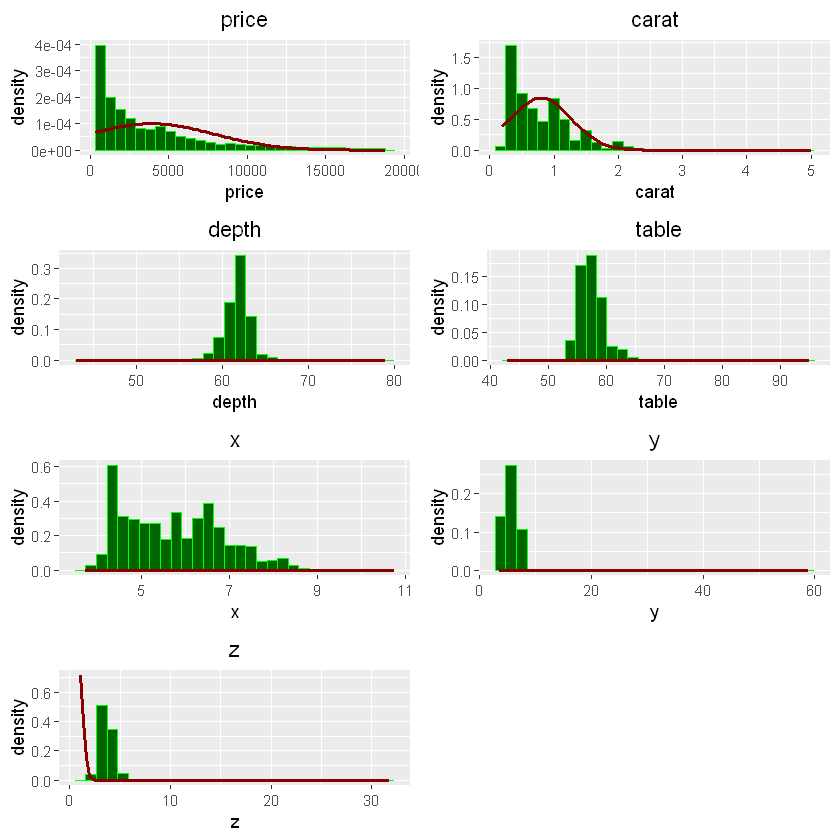

In [12]:
# price
price_hist <- ggplot(aes(price), data=clean) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('price')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(clean$price), 
                            sd = sd(clean$price)),
                color="darkred", size=1) +
  theme(plot.title = element_text(hjust = 0.5))

# carat
carat_hist <- ggplot(aes(carat), data=clean) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('carat')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(clean$carat), 
                            sd = sd(clean$carat)),
                color="darkred", size=1) +
  theme(plot.title = element_text(hjust = 0.5))

# depth
depth_hist <- ggplot(aes(depth), data=clean) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('depth')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(clean$carat), 
                            sd = sd(clean$carat)),
                color="darkred", size=1) +
  theme(plot.title = element_text(hjust = 0.5))

# table
table_hist <- ggplot(aes(table), data=clean) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('table')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(clean$carat), 
                            sd = sd(clean$carat)),
                color="darkred", size=1) +
  theme(plot.title = element_text(hjust = 0.5))

# x
x_hist <- ggplot(aes(x), data=clean) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('x')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(clean$carat), 
                            sd = sd(clean$carat)),
                color="darkred", size=1) +
  theme(plot.title = element_text(hjust = 0.5))

# y
y_hist <- ggplot(aes(y), data=clean) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('y')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(clean$carat), 
                            sd = sd(clean$carat)),
                color="darkred", size=1) +
  theme(plot.title = element_text(hjust = 0.5))

# z
z_hist <- ggplot(aes(z), data=clean) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('z')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(clean$carat), 
                            sd = sd(clean$carat)),
                color="darkred", size=1) +
  theme(plot.title = element_text(hjust = 0.5))

# plot all histograms in one page
grid.arrange(price_hist, carat_hist, depth_hist,
             table_hist, x_hist, y_hist, z_hist,
             ncol=2, nrow=4)  

## QQ Plots - check normality of individaul numeric variables

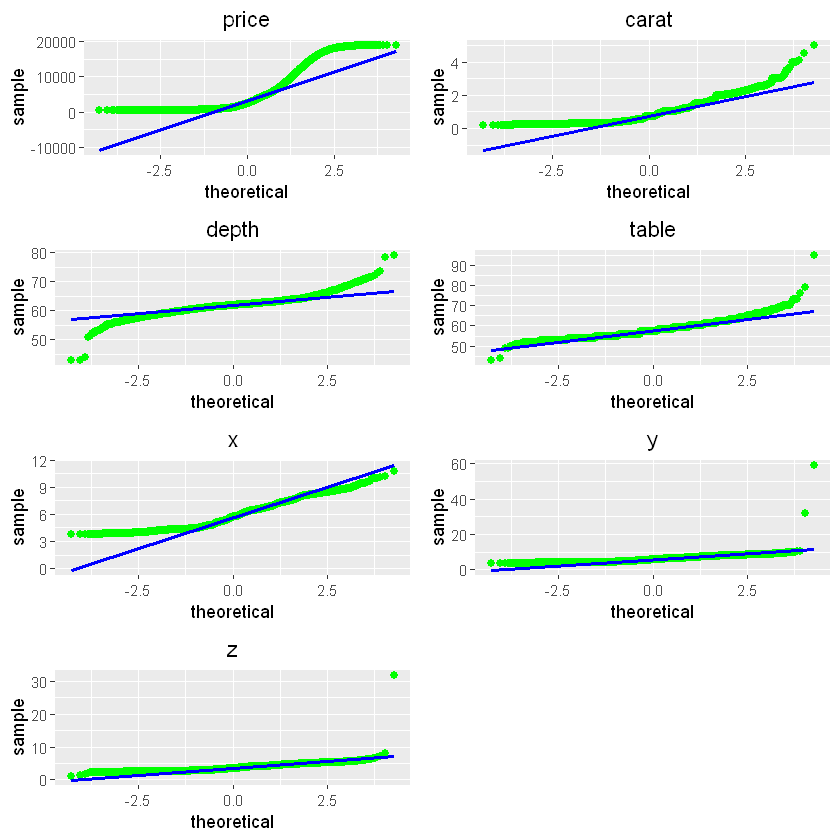

In [13]:
# price
price_qq <- ggplot(clean, aes(sample = price))+ 
  stat_qq(col="green", size=2) + 
  stat_qq_line(col="blue", lwd=1) +
  ggtitle("price") +
  theme(plot.title = element_text(hjust = 0.5))

# carat
carat_qq <- ggplot(clean, aes(sample = carat))+ 
  stat_qq(col="green", size=2) + 
  stat_qq_line(col="blue", lwd=1) +
  ggtitle("carat") +
  theme(plot.title = element_text(hjust = 0.5))

# depth
depth_qq <- ggplot(clean, aes(sample = depth))+ 
  stat_qq(col="green", size=2) + 
  stat_qq_line(col="blue", lwd=1) +
  ggtitle("depth") +
  theme(plot.title = element_text(hjust = 0.5))

# table
table_qq <- ggplot(clean, aes(sample = table))+ 
  stat_qq(col="green", size=2) + 
  stat_qq_line(col="blue", lwd=1) +
  ggtitle("table") +
  theme(plot.title = element_text(hjust = 0.5))

# x
x_qq <- ggplot(clean, aes(sample = x))+ 
  stat_qq(col="green", size=2) + 
  stat_qq_line(col="blue", lwd=1) +
  ggtitle("x") +
  theme(plot.title = element_text(hjust = 0.5))

# y
y_qq <- ggplot(clean, aes(sample = y))+ 
  stat_qq(col="green", size=2) + 
  stat_qq_line(col="blue", lwd=1) +
  ggtitle("y") +
  theme(plot.title = element_text(hjust = 0.5))

# z
z_qq <- ggplot(clean, aes(sample = z))+ 
  stat_qq(col="green", size=2) + 
  stat_qq_line(col="blue", lwd=1) +
  ggtitle("z") +
  theme(plot.title = element_text(hjust = 0.5))

# plot QQ plot in one page
grid.arrange(price_qq, carat_qq, depth_qq,
             table_qq, x_qq, y_qq, z_qq,
             ncol=2, nrow=4)  

## Pairwise scatter plots between price and other numeric variables

Warning message:
"Removed 942 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 942 rows containing missing values (geom_point)."Warning message:
"Removed 4 rows containing missing values (geom_smooth)."Warning message:
"Removed 1039 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1039 rows containing missing values (geom_point)."Warning message:
"Removed 865 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 865 rows containing missing values (geom_point)."Warning message:
"Removed 933 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 933 rows containing missing values (geom_point)."Warning message:
"Removed 13 rows containing missing values (geom_smooth)."Warning message:
"Removed 927 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 927 rows containing missing values (geom_point)."Warning message:
"Removed 14 rows containing missing values (geom_smooth)."Warn

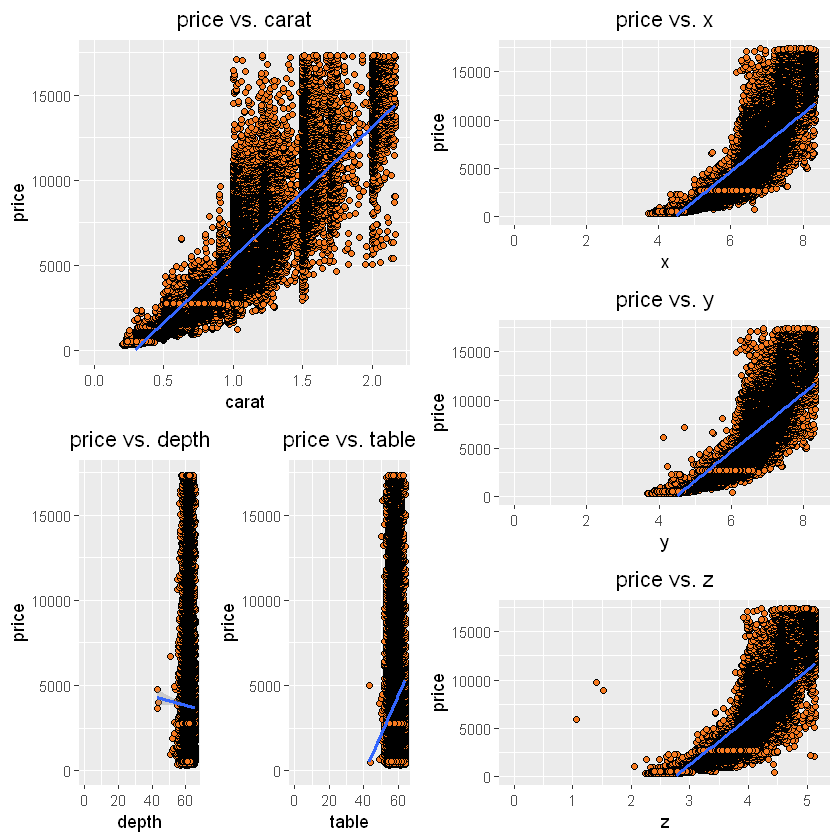

In [14]:
# price vs carat
price_carat <- ggplot(aes(x=carat, y=price), data=clean) +
  geom_point(fill=I("#f77a20"), color=I("black"), shape=21) +
  stat_smooth(method="lm") +
  scale_x_continuous(lim = c(0, quantile(clean$carat, 0.99)) ) +
  scale_y_continuous(lim = c(0, quantile(clean$price, 0.99)) ) +
  ggtitle("price vs. carat") +
  theme(plot.title = element_text(hjust = 0.5))

# price vs depth
price_depth <- ggplot(aes(x=depth, y=price), data=clean) +
  geom_point(fill=I("#f77a20"), color=I("black"), shape=21) +
  stat_smooth(method="lm") +
  scale_x_continuous(lim = c(0, quantile(clean$depth, 0.99)) ) +
  scale_y_continuous(lim = c(0, quantile(clean$price, 0.99)) ) +
  ggtitle("price vs. depth") +
  theme(plot.title = element_text(hjust = 0.5))

# price vs table
price_table <- ggplot(aes(x=table, y=price), data=clean) +
  geom_point(fill=I("#f77a20"), color=I("black"), shape=21) +
  stat_smooth(method="lm") +
  scale_x_continuous(lim = c(0, quantile(clean$table, 0.99)) ) +
  scale_y_continuous(lim = c(0, quantile(clean$price, 0.99)) ) +
  ggtitle("price vs. table") +
  theme(plot.title = element_text(hjust = 0.5))

# price vs x
price_x <- ggplot(aes(x=x, y=price), data=clean) +
  geom_point(fill=I("#f77a20"), color=I("black"), shape=21) +
  stat_smooth(method="lm") +
  scale_x_continuous(lim = c(0, quantile(clean$x, 0.99)) ) +
  scale_y_continuous(lim = c(0, quantile(clean$price, 0.99)) ) +
  ggtitle("price vs. x") +
  theme(plot.title = element_text(hjust = 0.5))

# price vs y
price_y <- ggplot(aes(x=y, y=price), data=clean) +
  geom_point(fill=I("#f77a20"), color=I("black"), shape=21) +
  stat_smooth(method="lm") +
  scale_x_continuous(lim = c(0, quantile(clean$y, 0.99)) ) +
  scale_y_continuous(lim = c(0, quantile(clean$price, 0.99)) ) +
  ggtitle("price vs. y") +
  theme(plot.title = element_text(hjust = 0.5))

# price vs z
price_z <- ggplot(aes(x=z, y=price), data=clean) +
  geom_point(fill=I("#f77a20"), color=I("black"), shape=21) +
  stat_smooth(method="lm") +
  scale_x_continuous(lim = c(0, quantile(clean$z, 0.99)) ) +
  scale_y_continuous(lim = c(0, quantile(clean$price, 0.99)) ) +
  ggtitle("price vs. z") +
  theme(plot.title = element_text(hjust = 0.5))
        
# plot pairwise scatter plot in one page
grid.arrange(arrangeGrob(price_carat, 
             price_depth, price_table, 
             ncol=2, nrow=2, 
             layout_matrix=rbind(c(1,1), c(2,3))),
             arrangeGrob(price_x, price_y, price_z, 
                         ncol=1, nrow=3), ncol=2)

## Correlations beween pairs of numerica variables

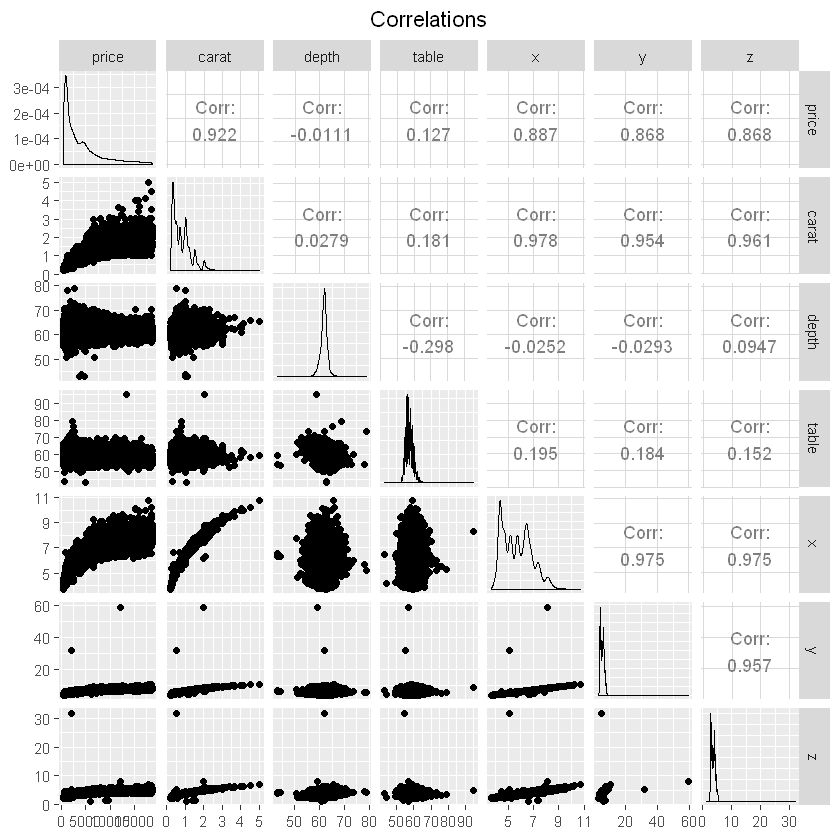

In [15]:
# A correlation matrix
ggpairs(clean[, c("price", "carat", "depth", "table", "x", "y", "z")], 
        upper =list(continuous="cor"), title = "Correlations")+
  theme(plot.title = element_text(hjust = 0.5))

## Box Plots between price and categorical variables

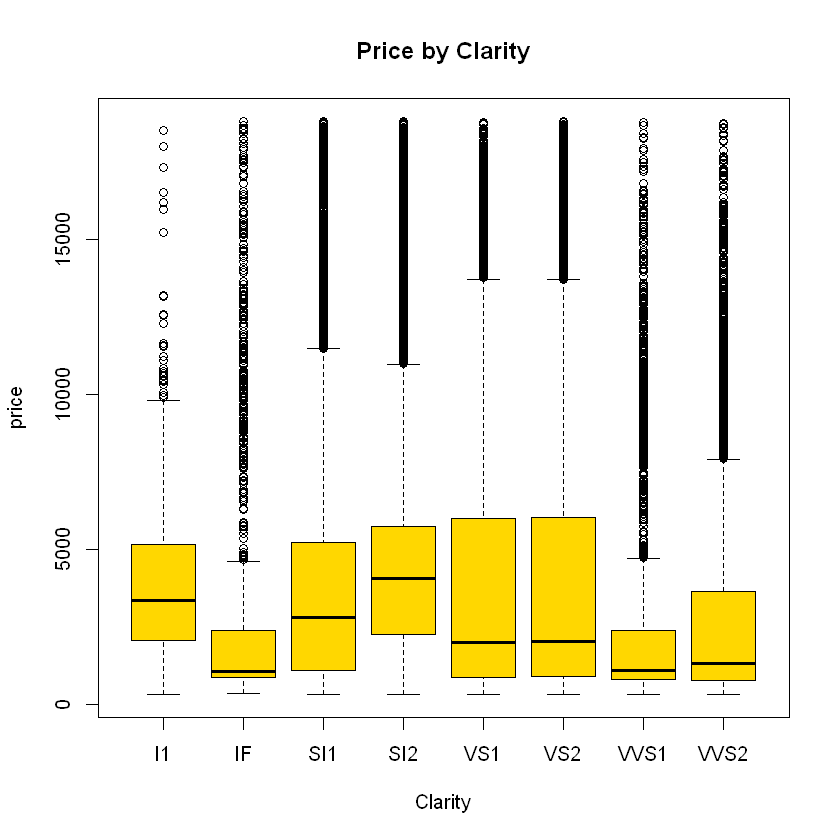

In [16]:
# price vs clarity
boxplot(price~clarity, data=clean, 
        col="gold",
        main="Price by Clarity", xlab="Clarity")

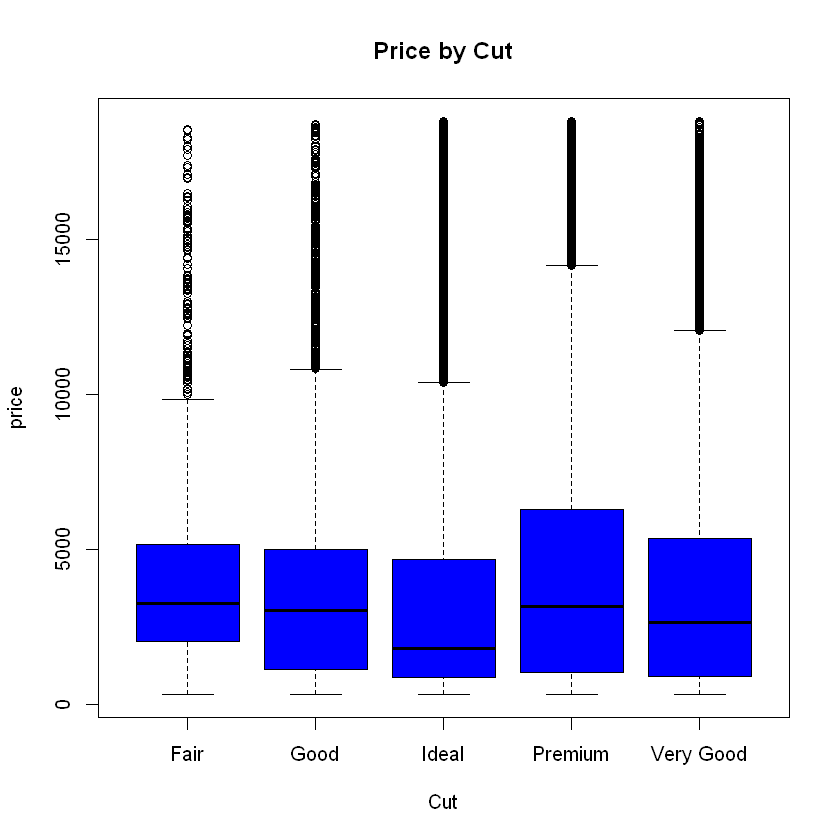

In [17]:
# price vs cut
boxplot(price~cut, data=clean, 
        col="blue",
        main="Price by Cut", xlab="Cut")

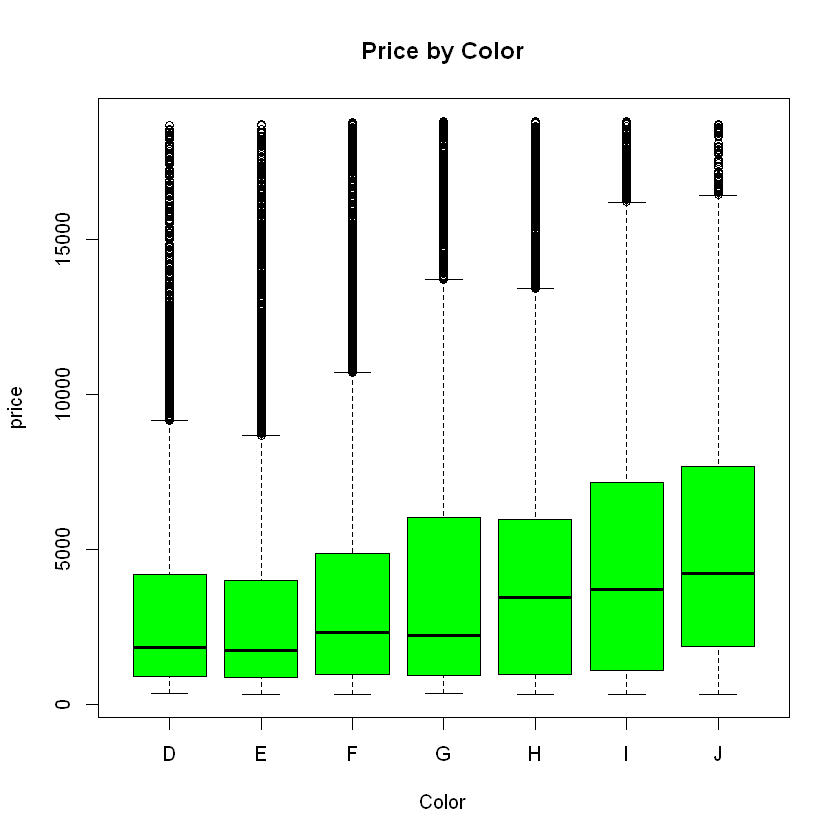

In [18]:
# price vs color
boxplot(price~color, data=clean, 
        col=("green"),
        main="Price by Color", xlab="Color")

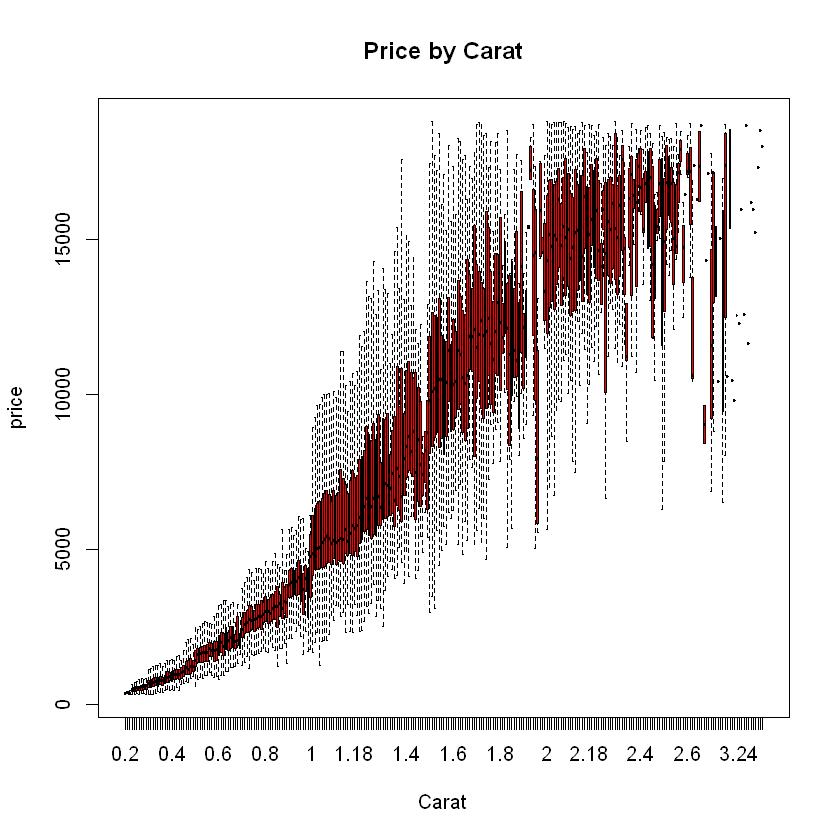

In [20]:
# Deal with carat as categorical
boxplot(price~carat, data=clean, outline=FALSE,
        col=("red"),
        main="Price by Carat", xlab="Carat")

## Associations between categorical variables

In [22]:
# Cramer's V shows the strength of association between categorical variables.
print("clarity vs cut:")
assocstats(table(clean$clarity, clean$cut))
print("clarity vs color:")
assocstats(table(clean$clarity, clean$color))
print("cut vs color:")
assocstats(table(clean$cut, clean$color))

[1] "clarity vs cut:"


                    X^2 df P(> X^2)
Likelihood Ratio 3430.0 28        0
Pearson          4373.4 28        0

Phi-Coefficient   : NA 
Contingency Coeff.: 0.274 
Cramer's V        : 0.143 

[1] "clarity vs color:"


                    X^2 df P(> X^2)
Likelihood Ratio 2115.4 42        0
Pearson          2040.1 42        0

Phi-Coefficient   : NA 
Contingency Coeff.: 0.191 
Cramer's V        : 0.08 

[1] "cut vs color:"


                    X^2 df P(> X^2)
Likelihood Ratio 308.55 24        0
Pearson          306.70 24        0

Phi-Coefficient   : NA 
Contingency Coeff.: 0.075 
Cramer's V        : 0.038 

# Feature Engineering

## Prepare diamond dataset for model training and testing

In [23]:
# Drop unwanted variables
drop <- c("depth","table","x","y","z")
clean = clean[, !(names(clean) %in% drop)]

In [24]:
# Log transformation
clean$logprice=log(clean$price + 1)
clean$logcarat=log(clean$carat + 1)

In [25]:
# Create ordinal features
# clarity_ord
clean$clarity_ord[clean$clarity=="I1"]<-1
clean$clarity_ord[clean$clarity=="SI2"]<-2
clean$clarity_ord[clean$clarity=="SI1"]<-3
clean$clarity_ord[clean$clarity=="VS2"]<-4
clean$clarity_ord[clean$clarity=="VS1"]<-5
clean$clarity_ord[clean$clarity=="VVS2"]<-6
clean$clarity_ord[clean$clarity=="VVS1"]<-7
clean$clarity_ord[clean$clarity=="IF"]<-8

# color_ord
clean$color_ord[clean$color=="J"]<-1
clean$color_ord[clean$color=="I"]<-2
clean$color_ord[clean$color=="H"]<-3
clean$color_ord[clean$color=="G"]<-4
clean$color_ord[clean$color=="F"]<-5
clean$color_ord[clean$color=="E"]<-6
clean$color_ord[clean$color=="D"]<-7

# cut_ord
clean$cut_ord[clean$cut=="Fair"]<-1
clean$cut_ord[clean$cut=="Good"]<-2
clean$cut_ord[clean$cut=="Very Good"]<-3
clean$cut_ord[clean$cut=="Premium"]<-4
clean$cut_ord[clean$cut=="Ideal"]<-5

In [26]:
# Look at the first 5 records of feature engineered diamond dataset
head(clean, 5)

carat,cut,color,clarity,price,logprice,logcarat,clarity_ord,color_ord,cut_ord
<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,326,5.789960,0.2070142,2,6,5
0.21,Premium,E,SI1,326,5.789960,0.1906204,3,6,4
0.23,Good,E,VS1,327,5.793014,0.2070142,5,6,2
0.29,Premium,I,VS2,334,5.814131,0.2546422,4,2,4
0.31,Good,J,SI2,335,5.817111,0.2700271,2,1,2


In [27]:
# Dummifies categorical variables into dummy features. The original categorical variable 
# will be replaced by dummy features. fullRank makes one less variable than the number 
# of categories present to avoid perfect collinearity.
dmy <- dummyVars(" ~ .", data = clean, fullRank =T)
dmy_df <- data.frame(predict(dmy, newdata = clean))

In [28]:
# Prepared dummy version dataset
drop <- c("carat","clarity_ord","color_ord","cut_ord")
clean2 = dmy_df[, !(names(dmy_df) %in% drop)]

col_order <- c(1:17,20,19,18)
my_data2 <- clean2[, col_order]

head(my_data2)


cut.Good,cut.Ideal,cut.Premium,cut.Very.Good,color.E,color.F,color.G,color.H,color.I,color.J,clarity.IF,clarity.SI1,clarity.SI2,clarity.VS1,clarity.VS2,clarity.VVS1,clarity.VVS2,logcarat,logprice,price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.2070142,5.789960,326
0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.1906204,5.789960,326
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.2070142,5.793014,327
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.2546422,5.814131,334
1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.2700271,5.817111,335
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.2151114,5.820083,336


## Prepare new diamond dataset for price prediction

In [29]:
# New diamond dataset is prepared to predict diamond price in model1 and model3.
# Drop the first unnamed column
new2 <- subset(new, select=-c(X))

# Log transformation
new2$logcarat=log(new2$carat + 1)

# Create ordinal features
new2$color_ord[new2$color=="J"]<-1
new2$color_ord[new2$color=="I"]<-2
new2$color_ord[new2$color=="H"]<-3
new2$color_ord[new2$color=="G"]<-4
new2$color_ord[new2$color=="F"]<-5
new2$color_ord[new2$color=="E"]<-6
new2$color_ord[new2$color=="D"]<-7

head(new2)


carat,cut,cut_ord,color,clarity,clarity_ord,logcarat,color_ord
<dbl>,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
1.22,Premium,4,G,SI1,3,0.7975072,4
1.01,Good,2,G,VS2,5,0.6981347,4
0.71,Very Good,3,I,VS2,5,0.5364934,2
1.01,Ideal,5,D,SI2,2,0.6981347,7
0.27,Ideal,5,H,VVS2,6,0.2390169,3
0.52,Premium,4,G,VS1,4,0.4187103,4


In [30]:
# Prepare dummy version new diamonds for diamond price prediction in model2
# that uses the dummy features as predictors.
dmy2 <- dummyVars(" ~ .", data = new2, fullRank =T)
dmy_new2 <- data.frame(predict(dmy2, newdata = new2))

head(dmy_new2)

carat,cut.Good,cut.Ideal,cut.Premium,cut.Very.Good,cut_ord,color.E,color.F,color.G,color.H,...,clarity.IF,clarity.SI1,clarity.SI2,clarity.VS1,clarity.VS2,clarity.VVS1,clarity.VVS2,clarity_ord,logcarat,color_ord
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.22,0,0,1,0,4,0,0,1,0,...,0,1,0,0,0,0,0,3,0.7975072,4
1.01,1,0,0,0,2,0,0,1,0,...,0,0,0,0,1,0,0,5,0.6981347,4
0.71,0,0,0,1,3,0,0,0,0,...,0,0,0,0,1,0,0,5,0.5364934,2
1.01,0,1,0,0,5,0,0,0,0,...,0,0,1,0,0,0,0,2,0.6981347,7
0.27,0,1,0,0,5,0,0,0,1,...,0,0,0,0,0,0,1,6,0.2390169,3
0.52,0,0,1,0,4,0,0,1,0,...,0,0,0,1,0,0,0,4,0.4187103,4


# Predictive Analysis

In [32]:
# We have two versions of datasets - clean: kept the original categorical variables; 
# and dummy: replaced the original categorical variables dummy features.

# In predictive analysis, we will three models: 
# Model 1 - uses ordinal features with the clean dataset;
# Model 2 - uses dummy features with dummy dataset;
# Model 3 - uses interaction from original categorical variables with the clean dataset.

# We will conduct the feature selection for model 2 as model 1 only has 3 ordinal Cs 
# and log transformed carat and model 3 only has only has 3 original categorical features
# and log carat, where R allows to add interaction with * between interactive features and
# machine will break down categorical features into their sub group levels and interact
# each other. 

# Note that the number of effects selected by machine is large, which ends with 129. 


## Model 1

### Split the data into training and test set

In [33]:
set.seed(123)
training.samples1 <- clean$price %>%
  createDataPartition(p=0.7, list=FALSE)
train.data1 <- clean[training.samples1,]
test.data1<- clean[-training.samples1,]

### Model1 training

In [34]:
model1 <- lm(logprice ~ logcarat + cut_ord + clarity_ord + color_ord, data=train.data1)
summary(model1)


Call:
lm(formula = logprice ~ logcarat + cut_ord + clarity_ord + color_ord, 
    data = train.data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32863 -0.14716  0.03893  0.15099  1.16371 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.3935829  0.0076388  575.17   <2e-16 ***
logcarat    4.4213945  0.0052724  838.60   <2e-16 ***
cut_ord     0.0260737  0.0010365   25.16   <2e-16 ***
clarity_ord 0.1104418  0.0007576  145.78   <2e-16 ***
color_ord   0.0884238  0.0007014  126.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2201 on 37640 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9528 
F-statistic: 1.902e+05 on 4 and 37640 DF,  p-value: < 2.2e-16


### Model 1 validation

In [35]:
# Apply model to testing/validation dataset
test.data1$pred1 <- model1 %>% predict(test.data1)

In [59]:
# (a) Prediction error, RMSE
print(paste0("RMSE: ", round(RMSE(test.data1$pred1, test.data1$logprice),4)))


[1] "RMSE: 0.2249"


In [58]:
# (b) Prediction R square
print(paste0("R Square: ", round(R2(test.data1$pred1, test.data1$logprice), 4)))


[1] "R Square: 0.9509"


In [61]:
# (c) Mean residual between predicted and actual price
test.data1$rs1 <- exp(test.data1$pred1)-1-test.data1$price
print(paste0("Dollar Residual: ", round(mean(test.data1$rs1),1)))

[1] "Dollar Residual: 270.6"


### Model 1 prediction in new diamond dataset

In [65]:
new2$newpred1 <- model1 %>% predict(new2)
new2$pred1price <- exp(new2$newpred1)-1
head(new2)
print(paste0("Total predicted dollars in new diamond dataset: ", 
             round(sum(new2$pred1price),0)))

carat,cut,cut_ord,color,clarity,clarity_ord,logcarat,color_ord,newpred1,pred1price
<dbl>,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1.22,Premium,4,G,SI1,3,0.7975072,4,8.708992,6056.1341
1.01,Good,2,G,VS2,5,0.6981347,4,8.438363,4619.9860
0.71,Very Good,3,I,VS2,5,0.5364934,2,7.572909,1943.7900
1.01,Ideal,5,D,SI2,2,0.6981347,7,8.450530,4676.5531
0.27,Ideal,5,H,VVS2,6,0.2390169,3,6.508661,669.9277
0.52,Premium,4,G,VS1,4,0.4187103,4,7.144623,1266.2741


[1] "Total predicted dollars in new diamond dataset: 12696482"


## Model 2

### Split the data into training and test set

In [66]:
set.seed(123)
training.samples2 <- my_data2$price %>%
  createDataPartition(p=0.7, list=FALSE)
train.data2 <- my_data2[training.samples2,]
test.data2<- my_data2[-training.samples2,]

head(train.data2,5)

,cut.Good,cut.Ideal,cut.Premium,cut.Very.Good,color.E,color.F,color.G,color.H,color.I,color.J,clarity.IF,clarity.SI1,clarity.SI2,clarity.VS1,clarity.VS2,clarity.VVS1,clarity.VVS2,logcarat,logprice,price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.2070142,5.789960,326
2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.1906204,5.789960,326
5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.2700271,5.817111,335
6,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.2151114,5.820083,336
7,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.2151114,5.820083,336


### Feature Selection

In [67]:
# stepwise method one - uses both forward and backward
m2.sel1 <- lm(logprice ~logcarat+cut.Good+cut.Ideal+cut.Premium+cut.Very.Good+
                   color.E+color.F+color.G+color.H+color.I+color.J+
                   clarity.IF+clarity.SI1+clarity.SI2+clarity.VS1+clarity.VS2+clarity.VVS1+clarity.VVS2, 
                 data = train.data2)

# Stepwise regression model
step.model21 <- stepAIC(m2.sel1, direction = "both", 
                      trace = FALSE)
summary(step.model21)



Call:
lm(formula = logprice ~ logcarat + cut.Good + cut.Ideal + cut.Premium + 
    cut.Very.Good + color.E + color.F + color.G + color.H + color.I + 
    color.J + clarity.IF + clarity.SI1 + clarity.SI2 + clarity.VS1 + 
    clarity.VS2 + clarity.VVS1 + clarity.VVS2, data = train.data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89126 -0.13273  0.02888  0.13872  1.11378 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.656062   0.011235  414.41   <2e-16 ***
logcarat       4.449828   0.004995  890.81   <2e-16 ***
cut.Good       0.059868   0.007187    8.33   <2e-16 ***
cut.Ideal      0.122327   0.006550   18.68   <2e-16 ***
cut.Premium    0.087624   0.006611   13.26   <2e-16 ***
cut.Very.Good  0.080620   0.006682   12.06   <2e-16 ***
color.E       -0.056894   0.003894  -14.61   <2e-16 ***
color.F       -0.080252   0.003939  -20.37   <2e-16 ***
color.G       -0.159458   0.003857  -41.34   <2e-16 ***
color.H       -0.280546   0.00410

In [68]:
# Stepwise method two: Backward
set.seed(123)
# Set up repeated k-fold cross-validation
train.control <- trainControl(method = "cv", number = 10)
# Train the model
step.model22 <- train(logprice ~logcarat+cut.Good+cut.Ideal+cut.Premium+cut.Very.Good+
                      color.E+color.F+color.G+color.H+color.I+color.J+
                      clarity.IF+clarity.SI1+clarity.SI2+clarity.VS1+clarity.VS2+clarity.VVS1+clarity.VVS2, 
                    data = train.data2,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:18),
                    trControl = train.control
)
step.model22$results
step.model22$bestTune
summary(step.model22$finalModel)

nvmax,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3048109,0.9095682,0.2356178,0.005464721,0.003233882,0.002298317
2,0.2935191,0.9161374,0.2252779,0.005772192,0.003327798,0.002519833
3,0.2825686,0.9222744,0.2156238,0.005708441,0.003191151,0.002624850
4,0.2769085,0.9253554,0.2126844,0.005599189,0.003101680,0.002540051
5,0.2702591,0.9288965,0.2079967,0.005070195,0.002771215,0.001955194
6,0.2639826,0.9321560,0.2024329,0.005450406,0.002907764,0.002112156
7,0.2547876,0.9367977,0.1940060,0.005496939,0.002808344,0.002459955
8,0.2414238,0.9432479,0.1857411,0.006084355,0.002907241,0.002438437
9,0.2310827,0.9480013,0.1782159,0.006011623,0.002707415,0.002252125


,nvmax
,<int>
18,18


Subset selection object
18 Variables  (and intercept)
              Forced in Forced out
logcarat          FALSE      FALSE
cut.Good          FALSE      FALSE
cut.Ideal         FALSE      FALSE
cut.Premium       FALSE      FALSE
cut.Very.Good     FALSE      FALSE
color.E           FALSE      FALSE
color.F           FALSE      FALSE
color.G           FALSE      FALSE
color.H           FALSE      FALSE
color.I           FALSE      FALSE
color.J           FALSE      FALSE
clarity.IF        FALSE      FALSE
clarity.SI1       FALSE      FALSE
clarity.SI2       FALSE      FALSE
clarity.VS1       FALSE      FALSE
clarity.VS2       FALSE      FALSE
clarity.VVS1      FALSE      FALSE
clarity.VVS2      FALSE      FALSE
1 subsets of each size up to 18
Selection Algorithm: backward
          logcarat cut.Good cut.Ideal cut.Premium cut.Very.Good color.E color.F
1  ( 1 )  "*"      " "      " "       " "         " "           " "     " "    
2  ( 1 )  "*"      " "      " "       " "         " "      

### Model2 training

In [69]:
model2 <- lm(logprice ~logcarat+cut.Good+cut.Ideal+cut.Premium+cut.Very.Good+
               color.E+color.F+color.G+color.H+color.I+color.J+
               clarity.IF+clarity.SI1+clarity.SI2+clarity.VS1+clarity.VS2+clarity.VVS1+clarity.VVS2, 
             data=train.data2)
summary(model2)


Call:
lm(formula = logprice ~ logcarat + cut.Good + cut.Ideal + cut.Premium + 
    cut.Very.Good + color.E + color.F + color.G + color.H + color.I + 
    color.J + clarity.IF + clarity.SI1 + clarity.SI2 + clarity.VS1 + 
    clarity.VS2 + clarity.VVS1 + clarity.VVS2, data = train.data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89126 -0.13273  0.02888  0.13872  1.11378 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.656062   0.011235  414.41   <2e-16 ***
logcarat       4.449828   0.004995  890.81   <2e-16 ***
cut.Good       0.059868   0.007187    8.33   <2e-16 ***
cut.Ideal      0.122327   0.006550   18.68   <2e-16 ***
cut.Premium    0.087624   0.006611   13.26   <2e-16 ***
cut.Very.Good  0.080620   0.006682   12.06   <2e-16 ***
color.E       -0.056894   0.003894  -14.61   <2e-16 ***
color.F       -0.080252   0.003939  -20.37   <2e-16 ***
color.G       -0.159458   0.003857  -41.34   <2e-16 ***
color.H       -0.280546   0.00410

### Model2 validation

In [70]:
# Apply model2 to testing/validation dataset
test.data2$pred2 <- model2 %>% predict(test.data2)

In [72]:
# (a) Prediction error, RMSE
print(paste0("Model2 RMSE: ", round(RMSE(test.data2$pred2, test.data2$logprice),4)))


[1] "Model2 RMSE: 0.2103"


In [73]:
# (b) Prediction R square
print(paste0("Model2 R Square: ", round(R2(test.data2$pred2, test.data2$logprice),4)))


[1] "Model2 R Square: 0.957"


In [80]:
# (c) Average residuals between predicted and actual price
test.data2$rs2 <- exp(test.data2$pred2)-1-test.data2$price
print(paste0("Model2 dollar residual: ", round(mean(test.data2$rs2),1)))


[1] "Model2 dollar residual: 256"


### Model2 prediction in new diamond dataset

In [81]:
dmy_new2$newpred2 <- model2 %>% predict(dmy_new2)
dmy_new2$pred2price <- exp(dmy_new2$newpred2)-1
head(dmy_new2)
print(paste0("Total predicted dollars in new diamond dataset: ", round(sum(dmy_new2$pred2price),0)))


carat,cut.Good,cut.Ideal,cut.Premium,cut.Very.Good,cut_ord,color.E,color.F,color.G,color.H,...,clarity.SI2,clarity.VS1,clarity.VS2,clarity.VVS1,clarity.VVS2,clarity_ord,logcarat,color_ord,newpred2,pred2price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.22,0,0,1,0,4,0,0,1,0,...,0,0,0,0,0,3,0.7975072,4,8.792980,6586.8326
1.01,1,0,0,0,2,0,0,1,0,...,0,0,1,0,0,5,0.6981347,4,8.448083,4665.1189
0.71,0,0,0,1,3,0,0,0,0,...,0,0,1,0,0,5,0.5364934,2,7.482951,1776.4791
1.01,0,1,0,0,5,0,0,0,0,...,1,0,0,0,0,2,0.6981347,7,8.356380,4256.2573
0.27,0,1,0,0,5,0,0,0,1,...,0,0,0,0,1,6,0.2390169,3,6.506079,668.1973
0.52,0,0,1,0,4,0,0,1,0,...,0,1,0,0,0,4,0.4187103,4,7.299785,1478.9822


[1] "Total predicted dollars in new diamond dataset: 12550854"


## Model 3

### Model3 training

In [82]:
# We use the trainin dataset used in model1, in which we select the original
# categorical features plus the interactions between features as the predictors.
model3 <- lm(logprice~logcarat + cut + clarity + color + 
               logcarat*cut + logcarat*clarity + logcarat*color
             + cut*clarity + cut*color + clarity*color, data=train.data1)
summary(model3)


Call:
lm(formula = logprice ~ logcarat + cut + clarity + color + logcarat * 
    cut + logcarat * clarity + logcarat * color + cut * clarity + 
    cut * color + clarity * color, data = train.data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19879 -0.10088  0.02214  0.11958  1.09638 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               5.4775757  0.0479166 114.315  < 2e-16 ***
logcarat                  3.1338177  0.0384093  81.590  < 2e-16 ***
cutGood                  -0.1853876  0.0382860  -4.842 1.29e-06 ***
cutIdeal                  0.0527565  0.0350150   1.507 0.131901    
cutPremium                0.0156392  0.0336542   0.465 0.642148    
cutVery Good             -0.1054467  0.0377657  -2.792 0.005239 ** 
clarityIF                 0.4545827  0.0732362   6.207 5.45e-10 ***
claritySI1               -0.1107498  0.0432311  -2.562 0.010417 *  
claritySI2               -0.0061489  0.0434938  -0.141 0.887575    
c

### Model3 validation

In [83]:
# Apply model to testing/validation dataset
test.data1$pred3 <- model3 %>% predict(test.data1)

In [84]:
# (a) Prediction error, RMSE
print(paste0("Model3 RMSE: ", round(RMSE(test.data1$pred3, test.data1$logprice),4)))


[1] "Model3 RMSE: 0.17"


In [85]:
# (b) Prediction R square
print(paste0("Model3 R Squre: ", round(R2(test.data1$pred3, test.data1$logprice),4)))


[1] "Model3 R Squre: 0.9719"


In [86]:
# (c) Average residuals between predicted and actual price
test.data1$rs3 <- exp(test.data1$pred3)-1-test.data1$price
print(paste0(": Total predicted dollars in new diamond dataset: ", round(mean(test.data1$rs3),1)))


[1] ": Total predicted dollars in new diamond dataset: 177.4"


### Model3 prediction in new diamond dataset

In [90]:
new2$newpred3 <- model3 %>% predict(new2)
new2$pred3price <- exp(new2$newpred3)-1
head(new2)
print(paste0("Total predicted dollars in new diamond dataset: ", round(sum(new2$pred3price),0)))

carat,cut,cut_ord,color,clarity,clarity_ord,logcarat,color_ord,newpred1,pred1price,newpred3,pred3price
<dbl>,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.22,Premium,4,G,SI1,3,0.7975072,4,8.708992,6056.1341,8.735128,6216.5278
1.01,Good,2,G,VS2,5,0.6981347,4,8.438363,4619.9860,8.512394,4975.0595
0.71,Very Good,3,I,VS2,5,0.5364934,2,7.572909,1943.7900,7.509423,1824.1594
1.01,Ideal,5,D,SI2,2,0.6981347,7,8.450530,4676.5531,8.335491,4168.2497
0.27,Ideal,5,H,VVS2,6,0.2390169,3,6.508661,669.9277,6.388785,594.1333
0.52,Premium,4,G,VS1,4,0.4187103,4,7.144623,1266.2741,7.303173,1484.0047


[1] "Total predicted dollars in new diamond dataset: 12299203"


## Summarize models

Warning message:
"Removed 264 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 264 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_smooth)."Warning message:
"Removed 255 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 255 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_smooth)."Warning message:
"Removed 195 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 195 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_smooth)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


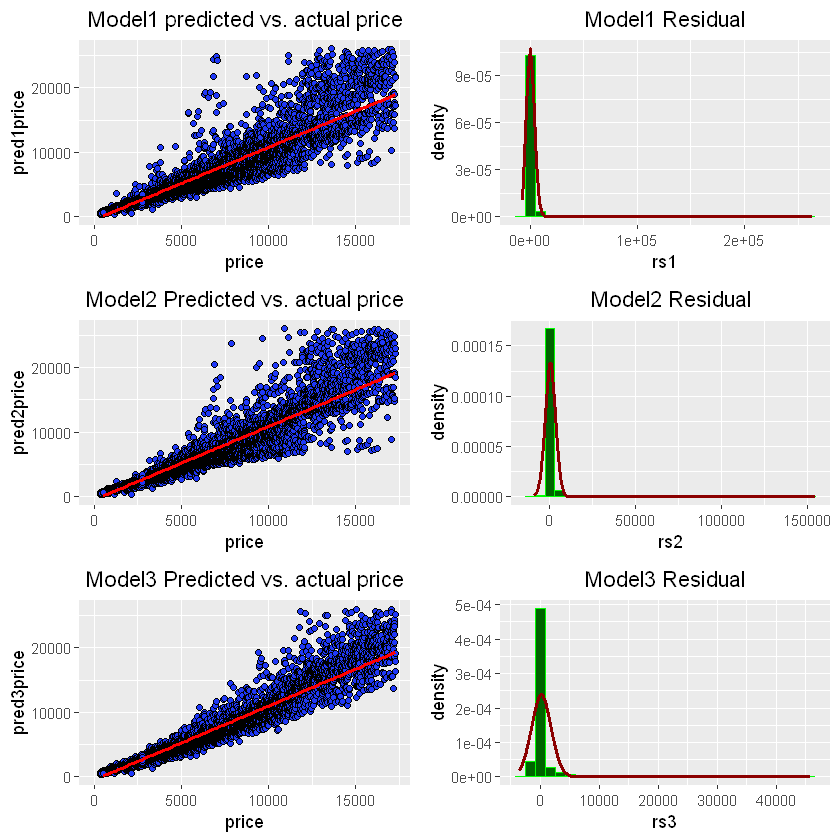

In [87]:
# Convert price from the log format
test.data1$pred1price <- exp(test.data1$pred1)-1

# Visualize the performance of model 1 - scatter
mod1_hist <- ggplot(aes(x=price, y=pred1price), data=test.data1) +
  geom_point(fill=I("#2039f7"), color=I("black"), shape=21) +
  stat_smooth(method="lm", col="red") +
  scale_x_continuous(lim = c(0, quantile(test.data1$price, 0.99)) ) +
  scale_y_continuous(lim = c(0, quantile(test.data1$pred1price, 0.99)) ) +
  ggtitle("Model1 predicted vs. actual price") +
  theme(plot.title = element_text(hjust = 0.5))

# Residuals
mod1_res <- ggplot(aes(rs1), data=test.data1) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('Model1 Residual')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(test.data1$rs1), 
                            sd = sd(test.data1$rs1)),
                color="darkred", size=1)+
  theme(plot.title = element_text(hjust = 0.5))

# Convert price from the log format
test.data2$pred2price <- exp(test.data2$pred2)-1

# Visualize the performance of model 2
mod2_hist <- ggplot(aes(x=price, y=pred2price), data=test.data2) +
  geom_point(fill=I("#2039f7"), color=I("black"), shape=21) +
  stat_smooth(method="lm", col="red") +
  scale_x_continuous(lim = c(0, quantile(test.data2$price, 0.99)) ) +
  scale_y_continuous(lim = c(0, quantile(test.data2$pred2price, 0.99)) ) +
  ggtitle("Model2 Predicted vs. actual price") +
  theme(plot.title = element_text(hjust = 0.5))

# Residual
mod2_res <- ggplot(aes(rs2), data=test.data2) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('Model2 Residual')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(test.data2$rs2), 
                            sd = sd(test.data2$rs2)),
                color="darkred", size=1)+
  theme(plot.title = element_text(hjust = 0.5))

# Convert price from the log format 
test.data1$pred3price <- exp(test.data1$pred3)-1

# Visualize the performance of model 1
mod3_hist <- ggplot(aes(x=price, y=pred3price), data=test.data1) +
  geom_point(fill=I("#2039f7"), color=I("black"), shape=21) +
  stat_smooth(method="lm", col="red") +
  scale_x_continuous(lim = c(0, quantile(test.data1$price, 0.99)) ) +
  scale_y_continuous(lim = c(0, quantile(test.data1$pred1price, 0.99)) ) +
  ggtitle("Model3 Predicted vs. actual price") +
  theme(plot.title = element_text(hjust = 0.5))

# Residual
mod3_res <- ggplot(aes(rs3), data=test.data1) +
  geom_histogram(aes(y=..density..),
                 color="green",
                 fill="darkgreen") +
  ggtitle('Model3 Residual')+
  stat_function(fun = dnorm, 
                args = list(mean = mean(test.data1$rs3), 
                            sd = sd(test.data1$rs3)),
                color="darkred", size=1)+
  theme(plot.title = element_text(hjust = 0.5))

# plot the performance of all models in one page
grid.arrange(arrangeGrob(mod1_hist, mod2_hist, mod3_hist, 
                         ncol=1, nrow=3),
             arrangeGrob(mod1_res, mod2_res, mod3_res, 
                         ncol=1, nrow=3), ncol=2)

# Conclusions

In [91]:
# Model3 with interactions between categorical features performed the best with achieved 
# R Square at 0.9719 and average residual of price prediction at $177.4 in the validation
# dataset and the total predicted dollars in 3,000 dimonds are $12.3 million. The suggested
# investment for the diamond will be $8.6 million if the discount is 70%.